# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [4]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [34]:
#Code Used: 9 reps are in the North branch
north_df.info()
north_df.head()
north_df['Rep ID'].value_counts()
# north_df['Rep ID'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [6]:
#Code Used: 11 reps are in the South branch
south_df.info()
south_df.head()
south_df['Rep ID'].value_counts().head(10000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
#Code Used:
busyminutes = north_df['Busy Minutes']
busyminutes.mean()
notreadyN = north_df['Not Ready Minutes']
notreadyN.mean()
incomingwaitN = north_df['Incoming Wait Time']
incomingwaitN.mean()
duringwaitN = north_df['During Call Wait Time']
duringwaitN.mean()

2.9673469387755103

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
#Code Used:
busyminutesS = south_df['Busy Minutes']
busyminutesS.mean()
notreadyS = south_df['Not Ready Minutes']
notreadyS.mean()
incomingwaitS = south_df['Incoming Wait Time']
incomingwaitS.mean()
duringwaitS = south_df['During Call Wait Time']
duringwaitS.mean()

3.0764331210191083

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# Code Used:
north_df['Time Block'].value_counts().head(10000) + south_df['Time Block'].value_counts().head(10000)

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: North is missing 163 Incoming Wait Time and South is missing 188 Incoming Wait Time. I took the mean of the Incoming Wait Time and then used the .fillna to fill the null values with the average Incoming Wait Time. 

In [79]:
# Code Used
# Add Additional Cells as needed.
# north_df.isna().sum()
# south_df.isna().sum()
# mean_incoming_wait_time_north = north_df['Incoming Wait Time'].mean()
# north_df['Incoming Wait Time'].fillna(mean_incoming_wait_time_north, inplace=True)
# north_df.isna().sum()
mean_incoming_wait_time_south = south_df['Incoming Wait Time'].mean()
south_df['Incoming Wait Time'].fillna(mean_incoming_wait_time_south, inplace=True)
south_df.isna().sum()
print (north_df)

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B   

     Rep ID Sale  Lost Call

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 

In [80]:
#Code Used
# Add Additional Cells as needed.

north_df['Sale'].replace('YES ', 'YES', True)
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer:There are no duplicates 

In [81]:
#Code Used
# Add Additional Cells as needed.
north_df.duplicated().sum()
south_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer:No

In [ ]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [138]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], axis=0)
df = df.reset_index(drop=True)

df.head(10)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [ ]:
# Code Used
# Add Additional Cells as needed.

In [149]:
rep_id_group = df[["Calls", "Branch", "Rep ID"]].groupby(["Rep ID", "Branch"]).sum()
sortcalls = rep_id_group.sort_values(["Calls"], ascending=False)
print(sortcalls)


               Calls
Rep ID Branch       
Brent  North      37
Eric   South      35
Randy  South      33
Sandy  South      32
Helga  South      31
Lilly  North      30
Todd   North      29
Duke   North      29
George South      29
Kate   South      29
Karl   South      28
Josh   South      26
Susan  South      26
Joe    North      26
Sharon South      25
Xander North      24
Cam    North      24
Amanda North      23
Andy   North      23
Alice  South      20


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%? No

In [151]:
# Code Used
# Add Additional Cells as needed.
avg_abandoned = df["Abandoned"].mean()*100
print(avg_abandoned)
avg_abandoned_north = north_df["Abandoned"].mean()*100
print(avg_abandoned_north)
avg_abandoned_south = south_df["Abandoned"].mean()*100
print (avg_abandoned_south)

1.9677996422182469
2.857142857142857
1.2738853503184715


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = # = 33, % = 40.2
- South Branch = # = 48, % = 38.1
- Company Wide = # = 81, % = 38.9

In [169]:
# Code Used
# Add Additional Cells as needed.



less_than_2s = df[df["Incoming Wait Time"] <= 2]
count_less_than_2s = len(less_than_2s)
print(count_less_than_2s)
#to take the percentage, I used the number of Incoming Wait Times that had data, not the ones that were originally missing.
print(count_less_than_2s/208*100)
less_than_2sN = north_df[north_df["Incoming Wait Time"] <= 2]
count_less_than_2sN = len(less_than_2sN)
print(count_less_than_2sN)
#to take the percentage, I used the number of Incoming Wait Times that had data, not the ones that were originally missing.
print(count_less_than_2sN/82*100)
less_than_2sS = south_df[south_df["Incoming Wait Time"] <= 2]
count_less_than_2sS = len(less_than_2sS)
print(count_less_than_2sS)
#to take the percentage, I used the number of Incoming Wait Times that had data, not the ones that were originally missing.
print(count_less_than_2sS/126*100)

81
38.94230769230769
33
40.243902439024396
48
38.095238095238095


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02 


In [159]:
# Code Used 
branches = ["North", "South"]

for branch in branches:
    avg_speed = df[df["Branch"] == branch]["Incoming Wait Time"].mean()
    print(f'The branch: {branch} had an average of {avg_speed} seconds')
avg_speed_answer = df["Incoming Wait Time"].mean()
print(f'The company average speed is {avg_speed_answer} seconds')


The branch: North had an average of 3.0487804878048683 seconds
The branch: South had an average of 3.0 seconds
The company average speed is 3.0213796413456047 seconds


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: Bar chart - because it is easy to compare which is the highest value, and also how they compare with each other. 

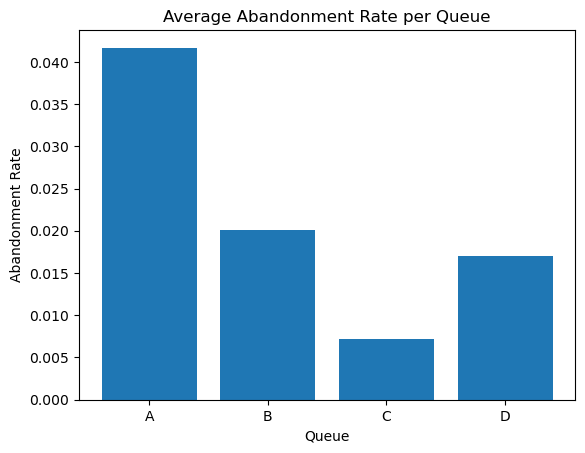

In [91]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

plt.bar(queues, abandonment_rates.values())
plt.title("Average Abandonment Rate per Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.show()



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: scatterplot - it helps show the correlation between the two variables and easy to visualize the reps compared to each other.

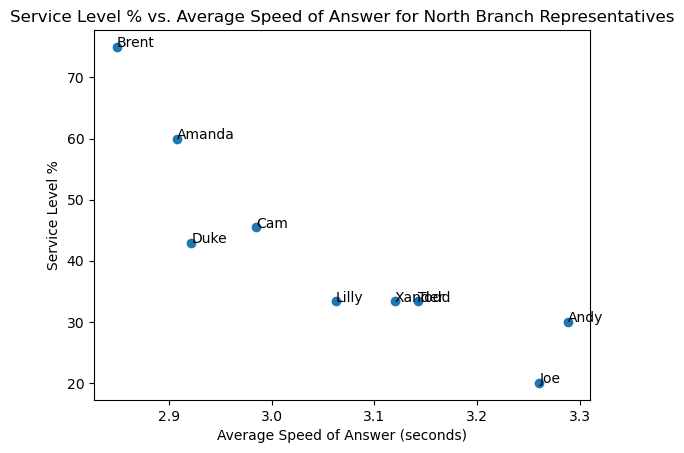

In [98]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

average_speed = north_df.groupby("Rep ID")["Incoming Wait Time"].mean()
north_plt = north_plt.merge(service_level, on="Rep ID")
north_plt = north_plt.rename(columns={"Incoming Wait Time": "Avg Speed"})

plt.scatter(north_plt["Avg Speed"], north_plt["Service Level %"])
plt.title("Service Level % vs. Average Speed of Answer for North Branch Representatives")
plt.xlabel("Average Speed of Answer (seconds)")
plt.ylabel("Service Level %")
for i, row in north_plt.iterrows():
    plt.text(row["Avg Speed"], row["Service Level %"], row["Rep ID"])
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}


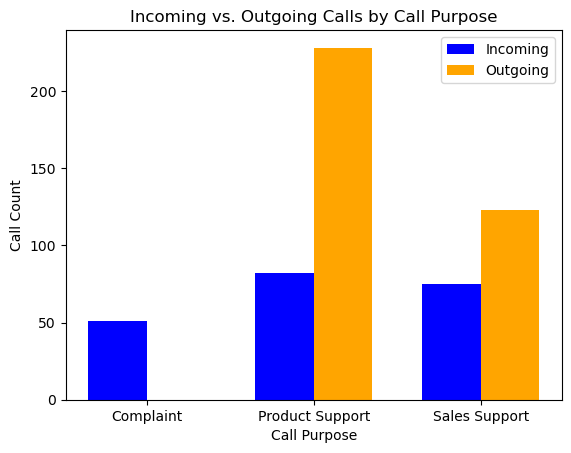

In [160]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

def check_dict_key(dict, key):
    # takes a dictionay and a key
    # if key does not exist in dict then return 0
    return dict.get(key, 0)

purpose_group = df.groupby("Call Purpose")
print(purpose_group)
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
print(complaints)
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
bar_width = 0.35
r1 = np.arange(len(call_purpose))
r2 = [x + bar_width for x in r1]


plt.bar(r1, 
        [
            check_dict_key(complaints,"Incoming"), 
            check_dict_key(product_support, "Incoming"), 
            check_dict_key(sales_support, "Incoming")
        ], 
        color="blue", 
        width=bar_width, 
        label="Incoming"
       )

plt.bar(r2, 
        [
            check_dict_key(complaints, "Outgoing"), 
            check_dict_key(product_support, "Outgoing"), 
            check_dict_key(sales_support, "Outgoing")
        ], 
        color="orange", 
        width=bar_width, 
        label="Outgoing"
       )

# labels and legend
plt.xlabel("Call Purpose")
plt.ylabel("Call Count")
plt.xticks([r + bar_width/2 for r in range(len(call_purpose))], call_purpose)
plt.legend()
plt.title('Incoming vs. Outgoing Calls by Call Purpose')


plt.show()



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
North is slightly more efficient since they have a higher service level. However, they could improve their abandonment rate compared to the South Branch.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
North would benefit from more representatives to improve their average speed.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
How long the representatives had been working there; this could impact the service level and speed. 

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: